In [1]:
%cd ..

/data/home/eak/learning/nganga_ai/imbizopm/ImbizoPM


# ImbizoPM Agents Test

This notebook demonstrates how to use the ImbizoPM agents to create and execute a project planning workflow.

In [2]:
from imbizopm_agents.graph import create_project_planning_graph, run_project_planning_graph
from IPython.display import display, Image
from langgraph.graph.graph import CompiledGraph

In [3]:
from langchain.chat_models import init_chat_model

# llm = init_chat_model("ollama:cogito:32b")
llm = init_chat_model("openai:gpt-4o")

# llm.invoke("Say 'hello'")

In [ ]:
# Create the project planning graph with checkpointing enabled
graph: CompiledGraph = create_project_planning_graph(llm, use_checkpointing=True, use_structured_output=False, use_two_step_generation=True)

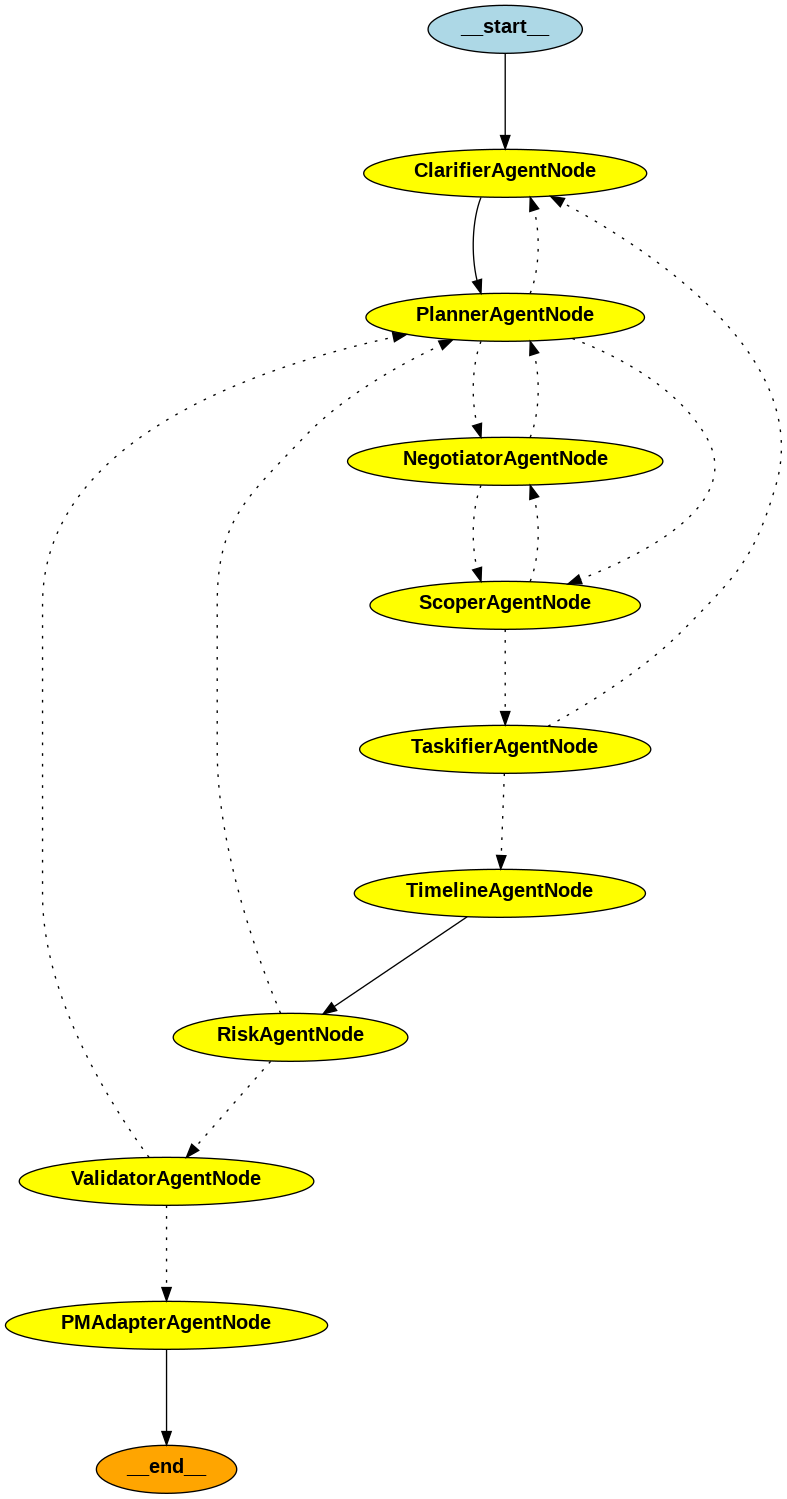

In [5]:
try:
    display(Image(graph.get_graph().draw_png()))
except Exception as e:
    print(f"Error creating graph: {e}")

## Running the Project Planning Process

We run the project planning graph with a sample input. The system will process the input through all the agents in the workflow and may request human assistance when needed.

In [6]:
PROJECT1 = """
Predict clinician responses to real-world clinical vignettes from rural Kenya, replicating expert nurse decision-making under low-resource healthcare constraints.
"""

PROJECT2 = """
AgentFlow is a Python library that automates the orchestration of multi-step agent workflows by integrating intelligent planning, routing, and execution of specialized operations.
"""

PROJECT = """
# Kenya-Clinical-Reasoning-Challenge

Zindi Challange : Predict clinician responses to real-world clinical vignettes from rural Kenya, replicating expert nurse decision-making under low-resource healthcare constraints.

## Can your model match real clinicians in rural Kenyan healthcare?

In many parts of the world, frontline healthcare workers make life-or-death decisions under pressure, with limited resources and specialist support. This challenge takes you to the heart of Kenyan healthcare, where nurses working across diverse counties and health facility levels face real-world clinical cases every day.

In this challenge, you'll be given 400 authentic clinical prompts—each one a carefully crafted vignette combining a nurse’s background and a complex medical situation. Your task is to predict the clinician’s response to each scenario, replicating the reasoning of trained professionals as closely as possible.

The vignettes span a wide range of medical domains, from maternal and child health to critical care, and were originally evaluated by expert clinicians and leading AI models (including GPT-4.0, LLAMA, and GEMINI). Each prompt includes details like the patient's presentation, nurse experience level, and facility type, simulating the nuance and challenge of real clinical environments in Kenya.

This dataset is small—only 400 training and 100 test samples—but that’s because collecting high-quality, expert-labelled medical data is hard. These are real-world cases, and every entry reflects the constraints and pressures faced by healthcare workers in underserved regions. In resource-limited settings, clinical decisions must be fast, accurate, and sensitive to both patient condition and system limitations. Your solution should aim to reflect that balance.

## About

The dataset contains real-world clinical vignettes drawn from frontline healthcare settings across Kenya. Each sample presents a prompt representing a clinical case scenario, along with the response from a human clinician. Your goal is to predict the clinician's response based on the prompt.

These vignettes simulate the types of decisions nurses in Kenya must make every day, particularly in low-resource environments where access to specialists or diagnostic equipment may be limited.

Each prompt was originally answered by expert clinicians as well as multiple large language models (LLMs) as part of a research initiative on AI in healthcare. For this challenge, we focus only on replicating the human clinician response.

## Important Notes

* These are real clinical scenarios, and the dataset is small because expert-labelled data is difficult and time-consuming to collect.
* Prompts are diverse across medical specialties, geographic regions, and healthcare facility levels, requiring broad clinical reasoning and adaptability.
* Responses may include abbreviations, structured reasoning (e.g. "Summary:", "Diagnosis:", "Plan:"), or free text.


## Evaluation

The evaluation metric for this challenge is the [ROUGE Score](https://zindi.africa/blog/zindi-error-metric-series-how-to-use-rouge-f-measure-for-machine-translation).

All clinician responses have been turned to lower case, punctuation removed and all paragraphs replaced with a space.

For every row in the dataset, submission files should contain 2 columns: ID and Translation.

Your submission file should look like this:

```
Master_Index     Clinician
```

```
ID_AAAitMaH      summary a 30 yr old...
```

If you are in the top 10 on the leaderboard you will be requested to prepare a [video](https://www.youtube.com/watch?v=oOaoWTd---E) to share with the host along with your code.

In the video you submit, you need to explain your approach to the problem as clearly as possible, including any relevant insights into the problem you discovered along the way (e.g. a clever way to engineer the raw features).

Final prizes will be judged and awarded by the host, based on the following criteria.

* The clarity of your pitch (how easy is it to understand the solution) - 25%
* The insights you obtained from tackling the problem - 15%
* How implementable is your code in a real application? Have you taken into account that the solution will be deployed on an edge device? - 25%
* Novel ideas taking into account complexities and real world applications - 25%
* Code that is clean, easy to read and work with - 10%

## Resource Restrictions

Your solution must be

* Quantized to reduce memory usage and improve inference speed
* Inference must be less than 100ms per vignette
* Inference RAM usage of less than 2 GB
* The maximum number of model parameters is 1 billion parameters
* Training should take no longer than 24 hours on a GPU similar to an NVIDIA T4 while inference should be on an NVIDIA Jetson Nano or equivalent.

Prizes

1st place: $5 000 USD

2nd place: $3 000 USD

3rd place: $2 000 USD

There are 5 000 Zindi points available. You can read more about [Zindi points here](https://zindi.africa/discussions/13959?utm_source=zindi&utm_medium=blog&utm_campaign=challenge_resources&utm_id=CR).

The results of this challenge will be written in a publication and challenge winners acknowledged as authors.

"""

In [7]:
# Run the project planning process
results = []
for result in run_project_planning_graph(
    graph,
    user_input=PROJECT,
    thread_id="demo-run-1",  # Adding a unique thread ID for this run
    recursion_limit = 30
):
    results.append(result)

# Display the number of steps processed
print(f"Process completed with {len(results)} steps")

2025-04-14 06:50:32.411 | INFO     | imbizopm_agents.graph:run_project_planning_graph:132 - {'input': '\n# Kenya-Clinical-Reasoning-Challenge\n\nZindi Challange : Predict clinician responses to real-world clinical vignettes from rural Kenya, replicating expert nurse decision-making under low-resource healthcare constraints.\n\n## Can your model match real clinicians in rural Kenyan healthcare?\n\nIn many parts of the world, frontline healthcare workers make life-or-death decisions under pressure, with limited resources and specialist support. This challenge takes you to the heart of Kenyan healthcare, where nurses working across diverse counties and health facility levels face real-world clinical cases every day.\n\nIn this challenge, you\'ll be given 400 authentic clinical prompts—each one a carefully crafted vignette combining a nurse’s background and a complex medical situation. Your task is to predict the clinician’s response to each scenario, replicating the reasoning of trained p

2025-04-14 06:50:41.368 | INFO     | imbizopm_agents.graph:run_project_planning_graph:130 - ================================== Ai Message ==================================

{
    "refined_idea": "Develop a machine learning model to predict clinician responses to clinical vignettes, replicating expert nurse decision-making under low-resource healthcare constraints in rural Kenya.",
    "goals": [
        "Design a model capable of accurately predicting clinician responses to diverse clinical cases represented in the vignettes.",
        "Ensure real-time model inference performance on resource-limited hardware such as the NVIDIA Jetson Nano.",
        "Adhere to constraints on model parameters, training time, and memory usage to allow for deployment in low-resource settings.",
        "Achieve a top 3 placement on the challenge leaderboard by optimizing the model's ROUGE Score evaluation metric."
    ],
    "constraints": [
        "The inference time must not exceed 100ms per vignette

Process completed with 9 steps


In [8]:
len(results)

9

In [17]:
event = results[0]

event

{'input': '\n# Kenya-Clinical-Reasoning-Challenge\n\nZindi Challange : Predict clinician responses to real-world clinical vignettes from rural Kenya, replicating expert nurse decision-making under low-resource healthcare constraints.\n\n## Can your model match real clinicians in rural Kenyan healthcare?\n\nIn many parts of the world, frontline healthcare workers make life-or-death decisions under pressure, with limited resources and specialist support. This challenge takes you to the heart of Kenyan healthcare, where nurses working across diverse counties and health facility levels face real-world clinical cases every day.\n\nIn this challenge, you\'ll be given 400 authentic clinical prompts—each one a carefully crafted vignette combining a nurse’s background and a complex medical situation. Your task is to predict the clinician’s response to each scenario, replicating the reasoning of trained professionals as closely as possible.\n\nThe vignettes span a wide range of medical domains, 

In [16]:
from imbizopm_agents.prompts.utils import dumps_to_yaml

In [ ]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[1]

print(dumps_to_yaml(event[key]))

constraints:
- The inference time must not exceed 100ms per vignette.
- Inference RAM usage must be below 2 GB.
- The model must have no more than 1 billion parameters.
- Training duration should not exceed 24 hours on a GPU similar to an NVIDIA T4.
- Submissions must comply with the structure and format specified in the challenge
    guidelines, including ID and Translation columns.
deliverables:
-   description: A quantized and optimized machine learning model that predicts clinician
        responses under specified resource constraints.
    name: Predictive Model
-   description: A clean, well-documented codebase that is easy to understand and
        modify, highlighting model training and inference processes.
    name: Annotated Codebase
-   description: A video presentation detailing the approach, key insights, and complexities
        addressed in developing the predictive model.
    name: Explanatory Video
-   description: A zip file containing the submission in the specified 

In [19]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[2]

print(dumps_to_yaml(event[key]))

PlannerAgent 


components:
-   description: Review challenge guidelines and constraints to define clear objectives
        and deliverables
    kind: phase
    name: Understanding Requirements
-   description: Design initial model architecture focusing on compliance with constraints
    kind: phase
    name: Model Design and Prototyping
-   description: Optimize model performance for real-time inference and low-resource
        environments
    kind: phase
    name: Quantization and Optimization
-   description: Test model against the challenge criteria including ROUGE Score and
        inference performance
    kind: phase
    name: Evaluation and Validation
-   description: Prepare submission materials including codebase documentation and
        explanatory video
    kind: phase
    name: Documentation and Presentation
-   description: Define model structure to ensure parameter and memory constraints
        are met
    kind: epic
    name: Model Architecture Design
-   description

In [20]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[3]

print(dumps_to_yaml(event[key]))

ScoperAgent 


exclusions:
- Advanced model configurations exceeding 1 billion parameters
- Inference taking longer than 100ms or exceeding 2 GB of RAM
- Training durations exceeding 24 hours or requiring high-end GPUs
mvp:
-   feature: Quantized and optimized machine learning model
    user_story: As a developer, I want to create a model that predicts clinician responses
        efficiently so that it adheres to low-resource constraints.
-   feature: Clean, well-documented codebase
    user_story: As a developer, I want to maintain a clear codebase to ease understanding
        and future modifications.
-   feature: Explanatory video
    user_story: As a challenge participant, I want to present my approach and insights
        to the judges effectively.
-   feature: Challenge submission package
    user_story: As a participant, I want to compile my submission in the specified
        format so that I meet the competition requirements.
overload: null
phases:
-   description: Focus on m

In [21]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[4]

print(dumps_to_yaml(event[key]))

TaskifierAgent 


missing_info: false
missing_info_details:
    questions: []
    suggestions: []
    unclear_aspects: []
tasks:
-   deliverable: Requirements Document
    dependencies: []
    description: Evaluate challenge guidelines to define clear objectives and deliverables,
        ensuring compliance with all specified constraints.
    epic: Model Architecture Design
    estimated_effort: Low
    id: TASK-001
    name: Review Challenge Guidelines
    owner_role: Project Manager
    phase: Understanding Requirements
-   deliverable: Initial Model Design
    dependencies:
    - TASK-001
    description: Design model architecture that meets parameter, memory, and inference
        time constraints. Emphasize compliance and efficiency.
    epic: Model Architecture Design
    estimated_effort: High
    id: TASK-002
    name: Design Initial Model Architecture
    owner_role: Machine Learning Engineer
    phase: Model Design and Prototyping
-   deliverable: Training Pipeline Prototype


In [22]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[5]

print(dumps_to_yaml(event[key]))

TimelineAgent 


critical_path:
- TASK-001
- TASK-002
- TASK-003
- TASK-004
- TASK-005
- TASK-006
- TASK-007
milestones:
- 'M1: Begin Review of Challenge Guidelines (T+0)'
- 'M2: Initial Model Design Completed (T+4)'
- 'M3: Prototype Training Pipeline Ready (T+6)'
- 'M4: Model Optimization Finished (T+9)'
- 'M5: Performance Evaluation Completed (T+11)'
- 'M6: Documentation and Video Prepared (T+13)'
- 'M7: Submission Package Compiled (T+14)'
task_durations:
    TASK-001:
        end: T+1
        start: T+0
    TASK-002:
        end: T+4
        start: T+1
    TASK-003:
        end: T+6
        start: T+4
    TASK-004:
        end: T+9
        start: T+6
    TASK-005:
        end: T+11
        start: T+9
    TASK-006:
        end: T+13
        start: T+11
    TASK-007:
        end: T+14
        start: T+13



In [23]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[6]

print(dumps_to_yaml(event[key]))

RiskAgent 


assumptions:
- The NVIDIA T4 GPU is readily available for the project
- All team members are skilled in necessary machine learning frameworks
- Dataset is pre-processed and ready for immediate use
dealbreakers: []
feasibility_concerns:
- 'Resource Constraints: Maintaining a balance between parameter count and model performance
    is challenging. Recommendation: Prioritize core performance metrics in early testing
    phases.'
feasible: true
risks:
-   category: Technical
    contingency_plan: Simplify model architecture and evaluate trade-offs between
        accuracy and speed
    description: Inference time may exceed 100ms due to model complexity
    impact: Medium
    mitigation_strategy: Implement model optimization techniques such as pruning and
        efficient algorithms
    priority: High
    probability: Medium
-   category: Technical
    contingency_plan: Experiment with distributed training across multiple GPUs
    description: Training duration might exceed 

In [24]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[7]

print(dumps_to_yaml(event[key]))

ValidatorAgent 


alignment_score: 90%
completeness_assessment:
    improvement_suggestions:
    - Detail specific strategies for achieving a top 3 placement on the leaderboard.
    missing_elements: []
constraints_respected:
    Inference RAM usage must be below 2 GB.:
        concerns: []
        evidence: Focused optimization for limited resources is detailed in the 'Inference
            Optimization' epic.
        respected: 'Yes'
    ? Submissions must comply with the structure and format specified in the challenge
        guidelines, including ID and Translation columns.
    :   concerns: []
        evidence: The 'Result Submission and Compliance' epic and 'Compile Submission
            Package' task ensure submission format compliance.
        respected: 'Yes'
    The inference time must not exceed 100ms per vignette.:
        concerns: []
        evidence: Plan emphasizes real-time inference performance in 'Quantization
            and Optimization' and 'Inference Optimizatio

In [25]:
key = event["forward"].replace("Node", "")
print(key, "\n\n")
event = results[8]

print(dumps_to_yaml(event[key]))

PMAdapterAgent 


executive_summary: The Clarifier Agent project aims to develop a machine learning
    model to predict clinician responses to clinical vignettes. This model will replicate
    expert nurse decision-making under low-resource healthcare constraints in rural
    Kenya. It must conform to resource constraints such as inference time under 100ms,
    RAM usage below 2 GB, and a parameter count under 1 billion. The project uses
    agile phases including model design, prototyping, optimization, and evaluation
    to achieve a top 3 placement on the challenge leaderboard based on the ROUGE Score.
key_milestones:
-   date: T+0
    deliverables:
    - Requirements Document
    name: Begin Review of Challenge Guidelines
-   date: T+4
    deliverables:
    - Initial Model Design
    name: Initial Model Design Completed
-   date: T+6
    deliverables:
    - Training Pipeline Prototype
    name: Prototype Training Pipeline Ready
-   date: T+9
    deliverables:
    - Optimized Model